In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [69]:
df=pd.read_csv('C:/Users/ARUP SARKAR/Desktop/ML/Linear Reg Practical Imp/smartwatchprice/data/processed_smartwatches.csv')

In [70]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene,Circle,Curved,Rectangle,Square
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,False,True,...,False,False,True,False,False,False,False,False,False,False
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df.shape

(181, 201)

In [72]:
x=df.drop('Discount Price',axis=1)
y=df['Discount Price']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) #80% training 20% testing

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

res=r2_score(y_test,y_pred)
print(res)

-28281.855192808787


In [75]:
from sklearn.tree import DecisionTreeRegressor

dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

0.7835387911709495


In [76]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

0.5331334199392929


In [77]:
import xgboost as xgb

model=xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

0.6958960389142593


In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

score=cross_val_score(dt_model,x,y,cv=5,scoring='r2')
print('cross_val_score: ',score,score.mean(),score.std())

0.755403628735133
cross_val_score:  [ 0.24616935  0.48123718 -0.0072215   0.04074759 -0.54060432] 0.04406566212907772 0.33954239928683333


In [80]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

score=cross_val_score(rf_model,x,y,cv=5,scoring='r2')
print('cross_val_score: ',score,score.mean(),score.std())

0.6171162736711104
cross_val_score:  [0.4845159  0.75432037 0.47964318 0.61243567 0.75820293] 0.617823609620045 0.12266338348687729


In [82]:
model=xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
res=r2_score(y_test,y_pred)
print(res)

score=cross_val_score(model,x,y,cv=5,scoring='r2')
print('cross_val_score: ',score,score.mean(),score.std())

0.6958960389142593
cross_val_score:  [0.71687457 0.85160856 0.65360352 0.52677189 0.59881393] 0.6695344907745987 0.11047932405115406


In [83]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[3,4,5],
    'learning_rate':[0.01,0.1,0.2]
}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_

best_model=xgb.XGBRegressor(**best_params)
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.7460260949741992


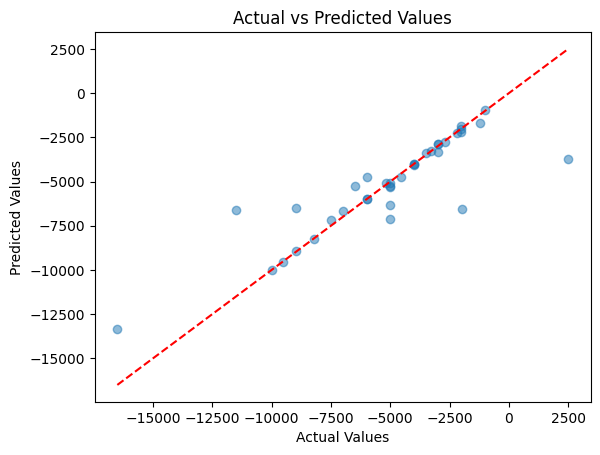

In [87]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test,y_pred,alpha=0.5)

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [89]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [90]:
with open('model.pkl','rb')as f:
    xgb_model=pickle.load(f)

In [92]:
y_pred=xgb_model.predict(x_test)

print(r2_score(y_test,y_pred))

0.7460260949741992
